# Prediksi Harga Dengan Linear Regresi

## Import Library

In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Dataset Yang Digunakan

In [163]:
data = pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [164]:
data2 = data[['price','bedrooms','bathrooms','grade','yr_built']]
price = data['price']
bed = data['bedrooms']
bath = data['bathrooms']
grade = data['grade']
year = data['yr_built']
data2.head(10)

,price,bedrooms,bathrooms,grade,yr_built
0,221900.0,3,1.00,7,1955
1,538000.0,3,2.25,7,1951
2,180000.0,2,1.00,6,1933
3,604000.0,4,3.00,7,1965
4,510000.0,3,2.00,8,1987
5,1225000.0,4,4.50,11,2001
6,257500.0,3,2.25,7,1995
7,291850.0,3,1.50,7,1963
8,229500.0,3,1.00,7,1960
9,323000.0,3,2.50,7,2003


In [165]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price      21613 non-null  float64
 1   bedrooms   21613 non-null  int64  
 2   bathrooms  21613 non-null  float64
 3   grade      21613 non-null  int64  
 4   yr_built   21613 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 844.4 KB


In [192]:
data2.describe()

,price,bedrooms,bathrooms,grade,yr_built
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,7.656873,1971.005136
std,3.671272e+05,0.930062,0.770163,1.175459,29.373411
min,7.500000e+04,0.000000,0.000000,1.000000,1900.000000
25%,3.219500e+05,3.000000,1.750000,7.000000,1951.000000
50%,4.500000e+05,3.000000,2.250000,7.000000,1975.000000
75%,6.450000e+05,4.000000,2.500000,8.000000,1997.000000
max,7.700000e+06,33.000000,8.000000,13.000000,2015.000000


In [167]:
#mengganti type data dari float ke integer
data['bathrooms'] = data['bathrooms'].astype('int')

In [191]:
data ['bedrooms'] = data ['bedrooms'].replace(33,3)

## Handling Missing Values

In [169]:
data2.isnull().sum()

price        0
bedrooms     0
bathrooms    0
grade        0
yr_built     0
dtype: int64

## Visualisasi Analisis Data

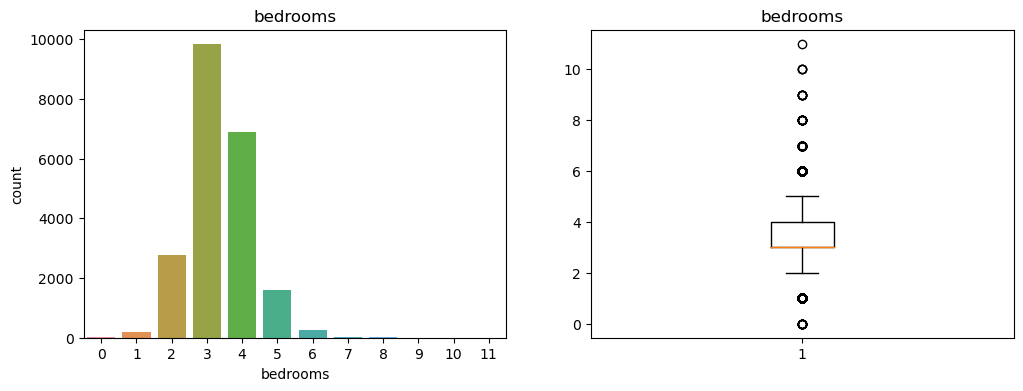

In [170]:
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(x='bedrooms', data = data)
plt.title("bedrooms")

f.add_subplot(1,2,2)
plt.boxplot(data['bedrooms'])
plt.title("bedrooms")
plt.show()

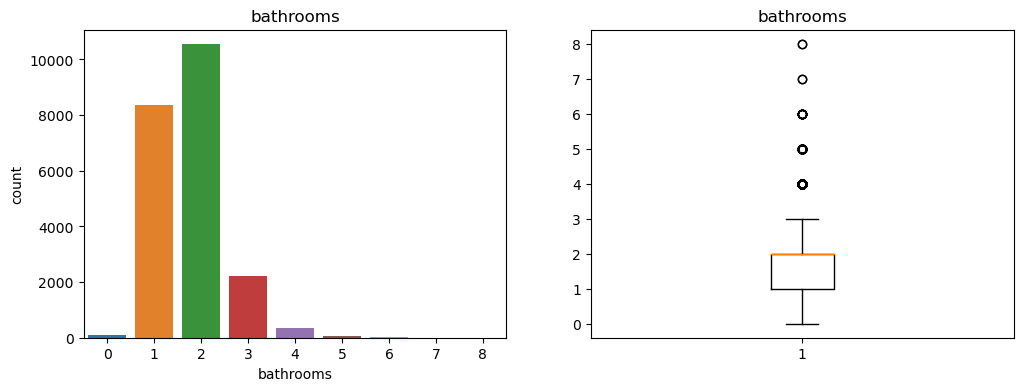

In [171]:
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(x='bathrooms', data = data)
plt.title("bathrooms")

f.add_subplot(1,2,2)
plt.boxplot(data['bathrooms'])
plt.title("bathrooms")
plt.show()

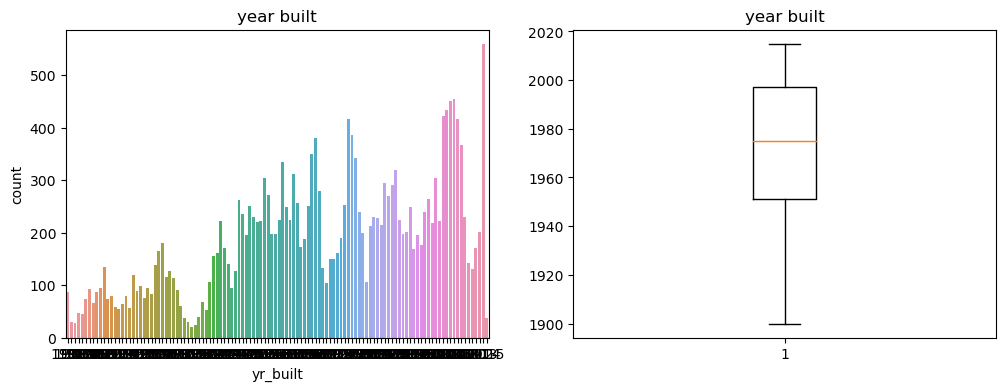

In [172]:
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(x='yr_built', data = data)
plt.title("year built")

f.add_subplot(1,2,2)
plt.boxplot(data['yr_built'])
plt.title("year built")
plt.show()

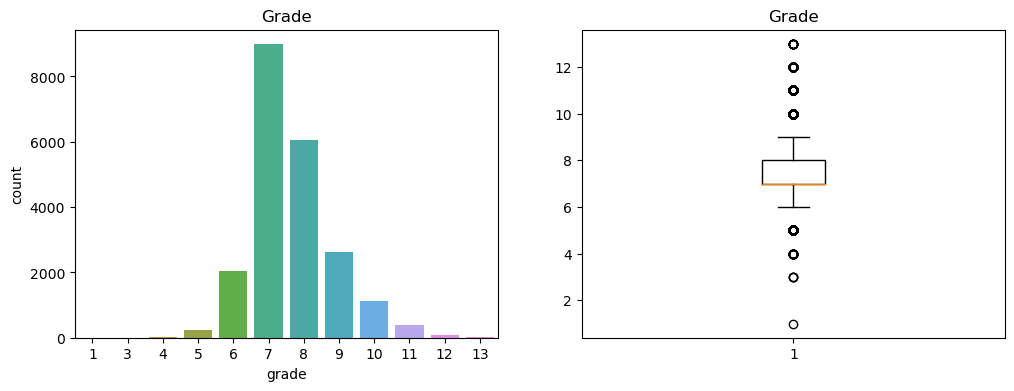

In [173]:
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(x='grade', data = data)
plt.title("Grade")

f.add_subplot(1,2,2)
plt.boxplot(data['grade'])
plt.title("Grade")
plt.show()

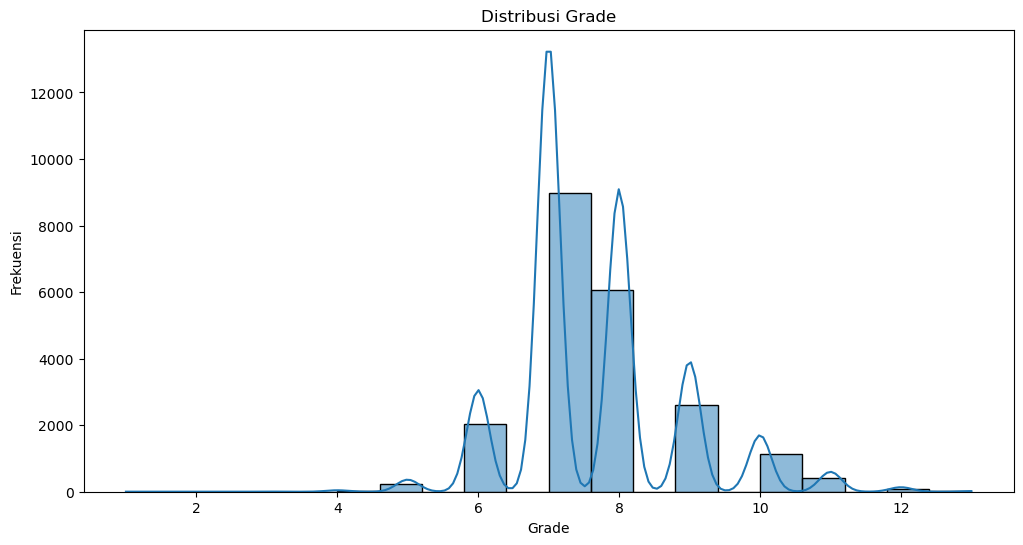

In [174]:
plt.figure(figsize=(12, 6))
sns.histplot(data['grade'], bins=20, kde=True)
plt.title('Distribusi Grade')
plt.xlabel('Grade')
plt.ylabel('Frekuensi')
plt.show()

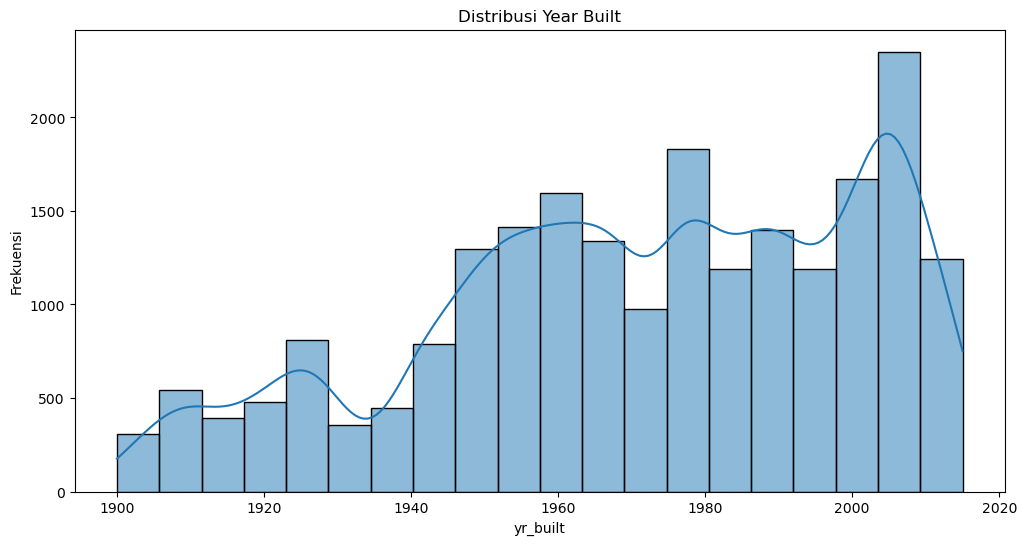

In [175]:
plt.figure(figsize=(12, 6))
sns.histplot(data['yr_built'], bins=20, kde=True)
plt.title('Distribusi Year Built')
plt.xlabel('yr_built')
plt.ylabel('Frekuensi')
plt.show() 

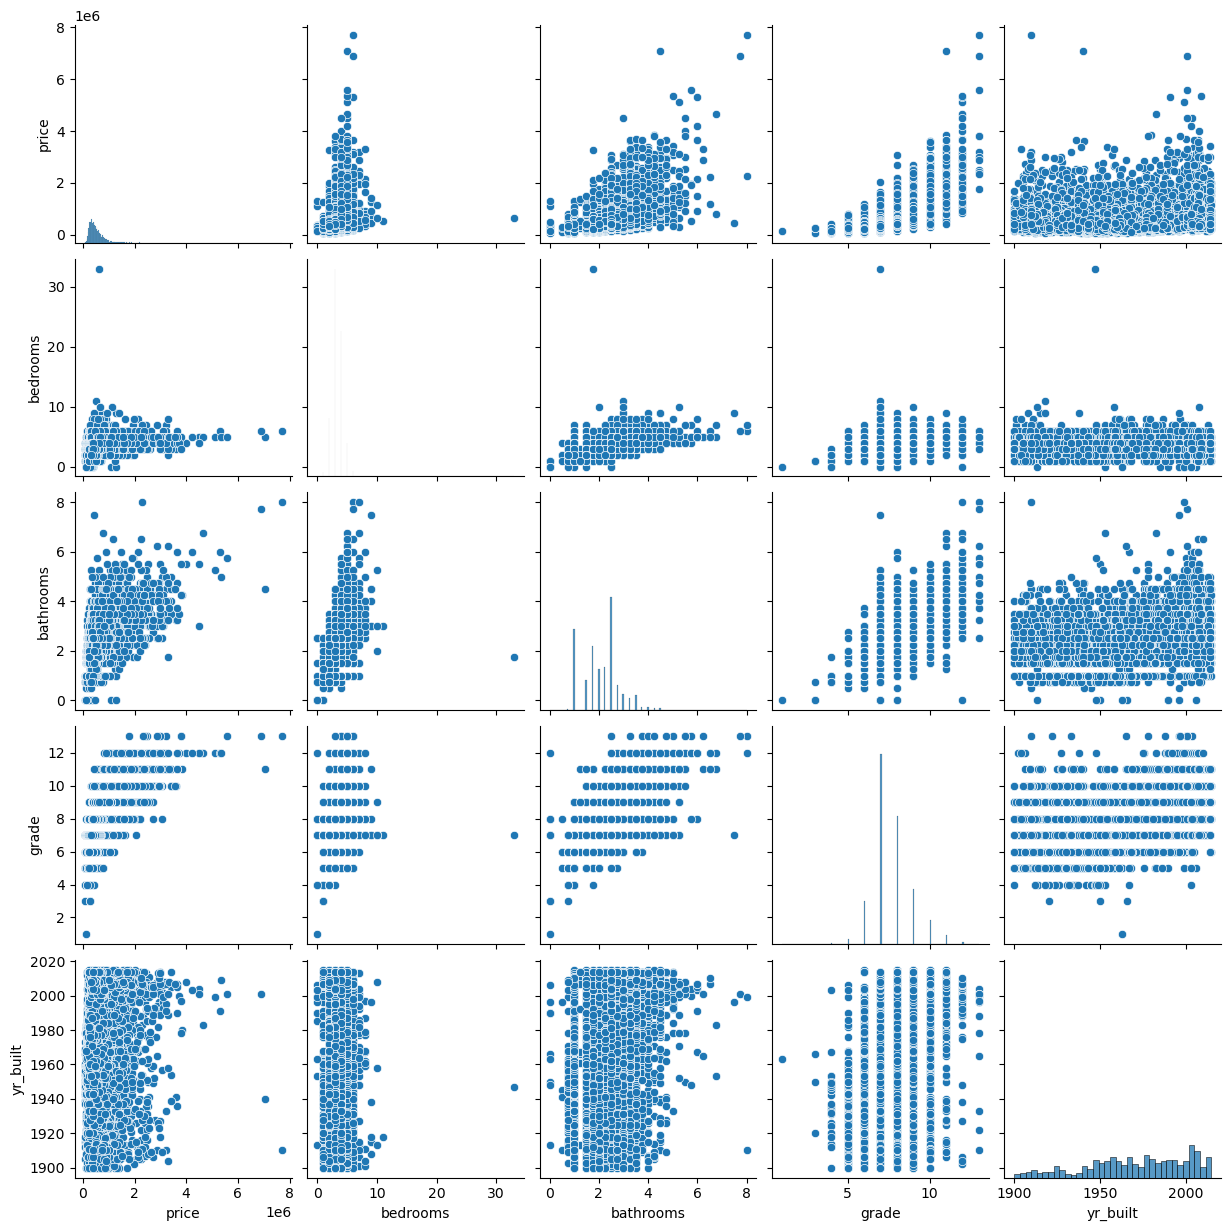

In [176]:
sns.pairplot(data2)

<Figure size 1000x800 with 0 Axes>

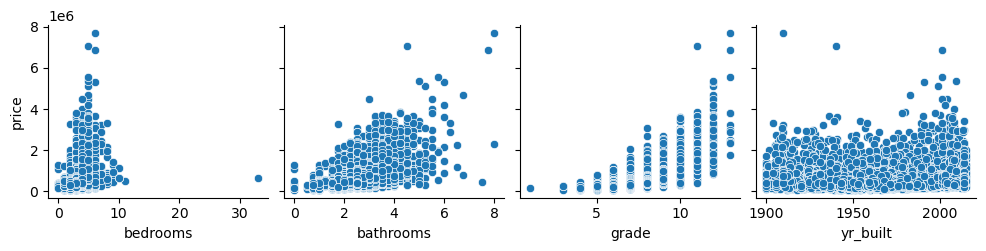

In [193]:
plt.figure(figsize=(10,8))
sns.pairplot(data=data2, x_vars=['bedrooms', 'bathrooms','grade', 'yr_built'], y_vars=['price'])
plt.show()

In [178]:
#mengetahui nilai korelasi antara variable dependent dan independent 
data2.corr().style.background_gradient().set_precision(2)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11576\3125133947.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  data2.corr().style.background_gradient().set_precision(2)


,price,bedrooms,bathrooms,grade,yr_built
price,1.00,0.31,0.53,0.67,0.05
bedrooms,0.31,1.00,0.52,0.36,0.15
bathrooms,0.53,0.52,1.00,0.66,0.51
grade,0.67,0.36,0.66,1.00,0.45
yr_built,0.05,0.15,0.51,0.45,1.00


## Modeling Data

In [179]:
data2.head()

,price,bedrooms,bathrooms,grade,yr_built
0,221900.0,3,1.00,7,1955
1,538000.0,3,2.25,7,1951
2,180000.0,2,1.00,6,1933
3,604000.0,4,3.00,7,1965
4,510000.0,3,2.00,8,1987


In [180]:
#variabel x dan y
    x = data2.drop(columns='price')
    y = data2['price']

In [181]:
#split data training dan testing sebesar 80:20
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=4)

In [182]:
#cek shape data training dan testing
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(17290, 4)
(17290,)
(4323, 4)
(4323,)


In [183]:
#fitting model regresi linear
regr = LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

In [190]:
#nilai koefisien dan intercept
print('coefisient',regr.coef_)
print('intercept',regr.intercept_)

coefisient [ -8450.5173219  147224.63914679 200647.8933026   -4794.26222678]
intercept 8170320.987733489


In [185]:
coef_dict = {
    'features':x.columns,
    'coef_value':regr.coef_
}
coef = pd.DataFrame(coef_dict, columns=['features','coef_value'])
coef

,features,coef_value
0,bedrooms,-8450.517322
1,bathrooms,147224.639147
2,grade,200647.893303
3,yr_built,-4794.262227


In [186]:
y_pred = regr.predict(x_test)

In [187]:
regr.score(x_test, y_test)

0.5544208279575353

Hasil accuracy score dari model machine learning ini sebesar 55.44%

## Prediksi harga rumah pertama

1. bedroom = 3
2. bathroom = 3
3. grade = 6
4. yr_built = 1995

In [188]:
regr.predict([[3,3,6,1995]])

L:\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([225977.57060381])

Harga rumah pertama adalah 225977 US$

## Prediksi Harga Rumah Kedua

1. bedroom = 4
2. bathroom = 2
3. grade = 8
4. yr_built = 2000

In [189]:
regr.predict([[4,2,8,2000]])

L:\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([447626.88960642])

Harga rumah kedua adalah 447626 US$